<blockquote> <h3> Project Title </h3> </blockquote>
<h1 style = 'color:#0C73D1;' > Data Analysis & Visualization of Loan Datasets: Exploring Meaningful Insights </h1>

<h4>Datasets:</h4>

1. __Portfolio_data.csv :__ Contains details on loans given to customers and their demographic information.
2. __CommunicationHistory.csv :__ Contains information on attempts made to reach out to these customers and the status of these calls.


<h4>Summary:</h4>
This portfolio project aims to analyze and visualize loan datasets to gain meaningful insights into the distribution and patterns of loans given to customers across different states and amounts. The project focuses on exploring the demographic information of customers, the attempts made to reach out to them, and the status of these calls.

The following points were investigated:
1. Distribution of loans across different states
2. Distribution of loans across different amounts
3. Distribution of customers by age
4. Distribution of loans by due dates
5. Unique number of customers contacted every day - only completed calls are to be considered - How many unique borrowers did we contact on day 1, day 2 etc.
6. Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc.
7. Who are the customers who have been contacted the most
8. Who are the customers who have been contacted the least
9. How many customers have never been reached out?
10. Distribution of calls by states.
11. Distribution of calls by campaign ids
12. Unique number of customers by campaign ID

<h4>Methodology:</h4>

This portfolio project will use data analysis and visualization techniques to explore the datasets and uncover insights related to the distribution of loans, borrowers, and communication history. The analysis will include cleaning, transforming, and aggregating the data, followed by creating visualizations such as bar charts, to present the findings. The project also demonstrates the use of Python programming language and its data science libraries such as Pandas, Matplotlib, and Seaborn, to perform the analysis and generate visualizations.

<h4>Expected Outcomes:</h4>

Through this project, we expect to gain insights into the loan datasets that can help in making informed decisions related to loan disbursement, borrower outreach, and campaign management.

***

In [1]:
# import all the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
sns.set(rc={'figure.figsize':(15,8)})
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# File path
Portfolio_data = r"C:\Users\tejas\OneDrive\Desktop\Downloads\csv files\Portfolio_data.csv"
CommunicationHistory = r"C:\Users\tejas\OneDrive\Desktop\Downloads\csv files\CommunicationHistory.csv"

### Portfolio dataset

In [3]:
portfolio_df = pd.read_csv(Portfolio_data)
portfolio_df.head()

,Loan Number,Due Date,State,DOB,Loan Amount
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23 00:00:00,56000.0
2,1004464,2022-11-01,UTTAR PRADESH,1996-12-01 00:00:00,50000.0
3,1004626,2022-11-01,KERALA,1995-07-14 00:00:00,63000.0
4,1005011,2022-11-01,MAHARASHTRA,1994-05-30 00:00:00,50000.0


In [4]:
portfolio_df.isnull().sum()

Loan Number    0
Due Date       0
State          0
DOB            1
Loan Amount    0
dtype: int64

In [5]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15962 entries, 0 to 15961
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Loan Number  15962 non-null  int64  
 1   Due Date     15962 non-null  object 
 2   State        15962 non-null  object 
 3   DOB          15961 non-null  object 
 4   Loan Amount  15962 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 623.6+ KB


### Communication dataset

In [6]:
communication_df = pd.read_csv(CommunicationHistory)
communication_df.head()

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02T02:59:40.973Z,completed
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02T03:57:51.335Z,completed
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02T04:34:26.950Z,completed
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02T04:34:57.213Z,completed
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02T04:36:21.594Z,completed


In [7]:
communication_df.isnull().sum()

Loan Number                           0
Campaign ID                           0
Communication Operator Message ID    10
Call time                             0
Status                                0
dtype: int64

In [8]:
communication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70607 entries, 0 to 70606
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Loan Number                        70607 non-null  int64 
 1   Campaign ID                        70607 non-null  int64 
 2   Communication Operator Message ID  70597 non-null  object
 3   Call time                          70607 non-null  object
 4   Status                             70607 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


# Merge Datasets

In [9]:
# let's merge both datasets
df = portfolio_df.merge(communication_df, on= 'Loan Number', how='inner')
df.head()

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Communication Operator Message ID,Call time,Status
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,166790104,dc1c8ea862eaeba0c7b805b54b7c16c3,2022-12-03T13:16:04.150Z,completed
1,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167104482,ffbd6015d04ebad7bba69b01d20316c4,2022-12-04T05:50:06.501Z,completed
2,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167820924,5f09e4392238cfa97478ff9f7a5616c4,2022-12-04T08:54:15.613Z,completed
3,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,168389540,6bb2f3df55050c400ff7fe3b446316c4,2022-12-04T13:04:32.924Z,completed
4,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,168801291,1ab943780657353aa727ac909fbf16c5,2022-12-05T04:48:55.139Z,completed


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70591 entries, 0 to 70590
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Loan Number                        70591 non-null  int64  
 1   Due Date                           70591 non-null  object 
 2   State                              70591 non-null  object 
 3   DOB                                70591 non-null  object 
 4   Loan Amount                        70591 non-null  float64
 5   Campaign ID                        70591 non-null  int64  
 6   Communication Operator Message ID  70581 non-null  object 
 7   Call time                          70591 non-null  object 
 8   Status                             70591 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.4+ MB


In [11]:
# print number of unique values in each column
for i in df.columns:
    print(f"In column {i}, There are total : {len(df[i].unique())} unique values.\n")

In column Loan Number, There are total : 11210 unique values.

In column Due Date, There are total : 30 unique values.

In column State, There are total : 39 unique values.

In column DOB, There are total : 5675 unique values.

In column Loan Amount, There are total : 270 unique values.

In column Campaign ID, There are total : 35 unique values.

In column Communication Operator Message ID, There are total : 70582 unique values.

In column Call time, There are total : 70547 unique values.

In column Status, There are total : 2 unique values.



In [12]:
# print number of null values
df.isnull().sum()

Loan Number                           0
Due Date                              0
State                                 0
DOB                                   0
Loan Amount                           0
Campaign ID                           0
Communication Operator Message ID    10
Call time                             0
Status                                0
dtype: int64

In [13]:
# drop Communication Operator Message ID , we don't want this column because it just unique keys
df.drop("Communication Operator Message ID", axis=1, inplace=True)

In [14]:
df.head(2)

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Call time,Status
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,166790104,2022-12-03T13:16:04.150Z,completed
1,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167104482,2022-12-04T05:50:06.501Z,completed


In [15]:
# let's convert timestamp to date column
df['Call Date'] = pd.to_datetime(df['Call time']).dt.date

In [16]:
df.head(2)

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Call time,Status,Call Date
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,166790104,2022-12-03T13:16:04.150Z,completed,2022-12-03
1,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167104482,2022-12-04T05:50:06.501Z,completed,2022-12-04


All the types of changes have been made, Let's analyze & visualize the data.

## 1. Distribution of loans across different states

In [17]:
df_loan = df[['State']].value_counts().reset_index(name='Count')
df_loan.head()

,State,Count
0,MAHARASHTRA,10264
1,KARNATAKA,8848
2,TAMIL NADU,7198
3,TELANGANA,6030
4,ANDHRA PRADESH,5459


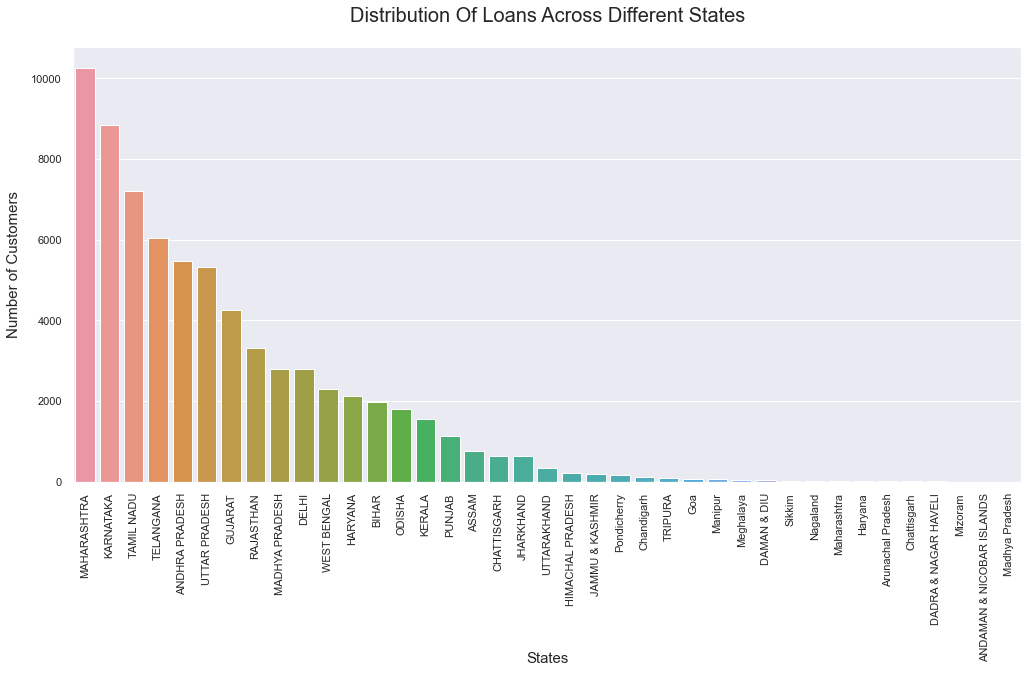

In [54]:
# let's visualize the distribution
ax = sns.barplot(x='State', y='Count', data = df_loan, ci=None)
plt.xticks(rotation=90)
plt.ylabel(ylabel = "Number of Customers" , labelpad=10, fontdict = {'size':15})
plt.xlabel(xlabel = "States" , labelpad=-10, fontdict = {'size':15})
plt.tick_params(pad=5)
plt.title("Distribution Of Loans Across Different States",fontdict={'size':20}, pad=25)
plt.show()

__Insights and Inferences__
1. Number of customers was highest for MAHARASHTRA at 10285, followed by KARNATAKA and TAMIL NADU.
2. MAHARASHTRA accounted for 14.57% of customers.
3. There are 15 states that have number of customers less than 100.
4. Across all 35 state, number of customers ranged from 4 to 10285.

## 2. Distribution of loans across different amounts

In [19]:
df_amounts = df['Loan Amount'].value_counts().rename_axis('Amount').reset_index(name="Count").sort_values('Count', ascending=False).nlargest(30, 'Count')

In [20]:
df_amounts.head()

,Amount,Count
0,5000.0,29625
1,7000.0,14385
2,5017.0,4227
3,10000.0,3125
4,5020.0,1725


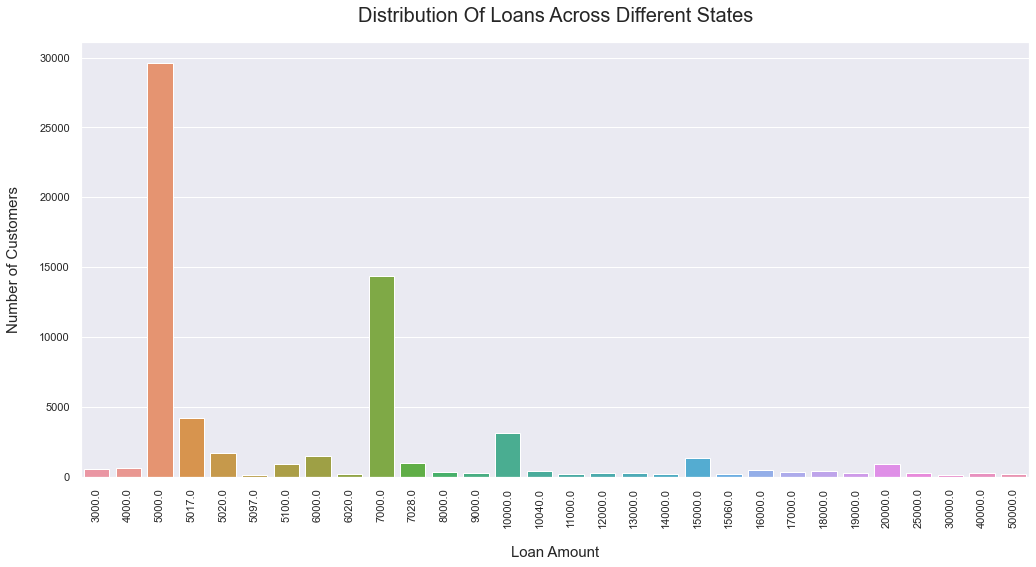

In [55]:
sns.barplot(x='Amount', y='Count', data=df_amounts, ci=None)
plt.xticks(rotation=90)
plt.ylabel(ylabel = "Number of Customers" , labelpad=18, fontdict = {'size':15})
plt.xlabel(xlabel = "Loan Amount" , labelpad=18, fontdict = {'size':15})
plt.tick_params(pad=5)
plt.title("Distribution Of Loans Across Different States",fontdict={'size':20}, pad=20)
plt.show()

__Insights and Inferences__
1. Most of the customers took a loan of Rs.5000, and they are around 29625 customers, followed by a loan amount of Rs. 7000, which was availed by 14385 customers.
2. There are only 12 customers who availed loan amount above Rs.1,00,000. Only 5 customers availed the maximum loan amount of Rs.2,40,000.
3. Across all the loan amounts, The Loan amount ranged from 3,000 Rs. to 2,40,000 Rs.

## 3. Distribution of customers by age

In [22]:
df.head(3)

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Call time,Status,Call Date
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,166790104,2022-12-03T13:16:04.150Z,completed,2022-12-03
1,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167104482,2022-12-04T05:50:06.501Z,completed,2022-12-04
2,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,167820924,2022-12-04T08:54:15.613Z,completed,2022-12-04


In [23]:
# import datetime to get current date
from datetime import date

# Convert DOB column into date column
df['DOB'] = pd.to_datetime(df['DOB']).dt.date

# calculate age by subtracting DOB from current date and dividing by 365.25 (accounting for leap years)
df['Age'] = ((date.today() - df['DOB']) / pd.Timedelta(days=1)) // 365.25

df['Age'] = df['Age'].astype('int64')

In [24]:
df.head()

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Call time,Status,Call Date,Age
0,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,166790104,2022-12-03T13:16:04.150Z,completed,2022-12-03,36
1,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,167104482,2022-12-04T05:50:06.501Z,completed,2022-12-04,36
2,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,167820924,2022-12-04T08:54:15.613Z,completed,2022-12-04,36
3,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,168389540,2022-12-04T13:04:32.924Z,completed,2022-12-04,36
4,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,168801291,2022-12-05T04:48:55.139Z,completed,2022-12-05,36


In [25]:
df_age = df['Age'].value_counts().rename_axis('Age').reset_index(name='Count')
df_age.head()

,Age,Count
0,24,5459
1,23,5125
2,25,5038
3,26,4943
4,28,4679


### Let's visualize the distribution of age

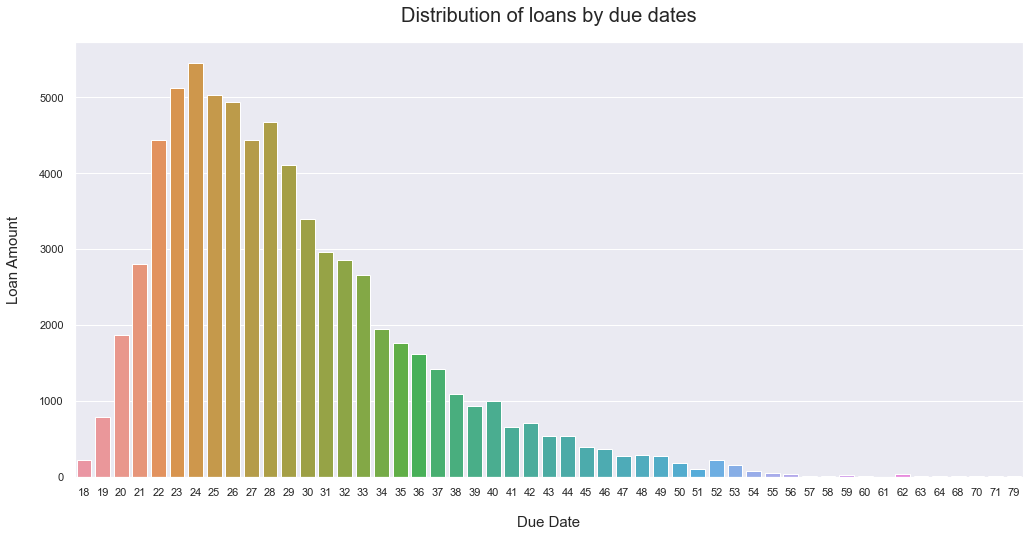

In [56]:
sns.barplot(x='Age', y='Count', data=df_age, ci=None)
plt.ylabel(ylabel = "Loan Amount" , labelpad=18, fontdict = {'size':15})
plt.xlabel(xlabel = "Due Date" , labelpad=18, fontdict = {'size':15})
plt.tick_params(pad=5)
plt.title("Distribution of loans by due dates",fontdict={'size':20}, pad=20)
sns.set(rc={'figure.figsize':(17,8)})
plt.show()

__Insights and Inferences__
1. 24 year old customers had the highest Count of Age at 5,411, followed by 23 and 25. 61 had the lowest Count of Age at 1.
2. 24 year old customers accounted for 7.67% of Count of Age.
3. Across all 51 Age's, Count of Age ranged from 1 to 5,411.

### Let's visualize the distribution of age groups

In [27]:
# Let's create bin lables for age groups
labels = []
for key, val in (zip(np.arange(0, 100, 10), np.arange(10, 110, 10))):
    labels.append(f"{key}-{val}")

print(labels)

['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


In [28]:
# Let's create bin values for age groups
bins = np.arange(0, 100, 10).tolist()
print(bins)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [29]:
# let's make age groups using bins and bin labels
df['Age_groups'] = pd.cut(df['Age'], labels=labels[0:-1], bins=bins)

In [30]:
df_age_groups = df['Age_groups'].value_counts().rename_axis('Age_Group').reset_index(name='Count')
df_age_groups

,Age_Group,Count
0,20-30,44433
1,30-40,18246
2,40-50,4233
3,10-20,2877
4,50-60,708
5,60-70,75
6,70-80,19
7,0-10,0
8,80-90,0


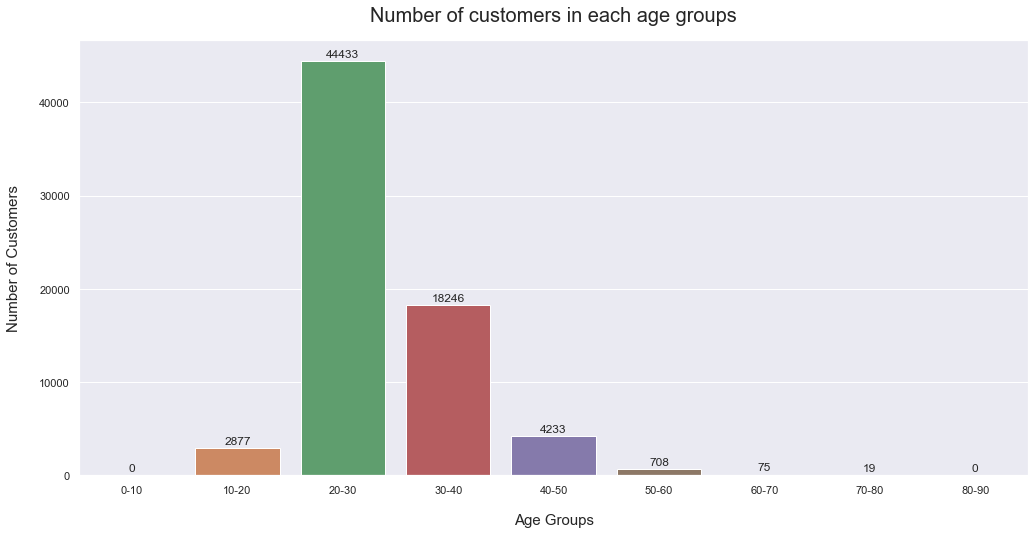

In [31]:
ax = sns.barplot(x=df_age_groups['Age_Group'], y=df_age_groups['Count'], ci=None)
ax.set_title('Number of customers in each age groups', fontdict={'size':20}, y=1.03)
ax.set_ylabel('Number of Customers', fontdict={'size':15}, labelpad=18)
ax.set_xlabel('Age Groups', fontdict={'size':15}, labelpad=18)
x_tick_labels = ax.get_xticklabels()
xtick_order = [label.get_text() for label in x_tick_labels]
order_val = [df_age_groups[df_age_groups['Age_Group']==i].Count.values[0] for i in xtick_order]
ax.bar_label(ax.containers[0], labels= order_val, padding=2)
plt.show()

__Insights and Inferences__
1. Number of customers was highest for 20-30 age groups at 44437, followed by 30-40 and 40-50 age group.
2. 20-30 Age group accounted for 62.95% of all the customers.
3. Across all 9 Age Group, Number of customers ranged from 0 to 44437.

## 4. Distribution of loans by due dates

In [32]:
df_date = df[['Due Date']].value_counts().reset_index(name='Count')
df_date.head()

,Due Date,Count
0,2022-11-25,5372
1,2022-11-19,4678
2,2022-11-02,4178
3,2022-11-20,3745
4,2022-11-01,3545


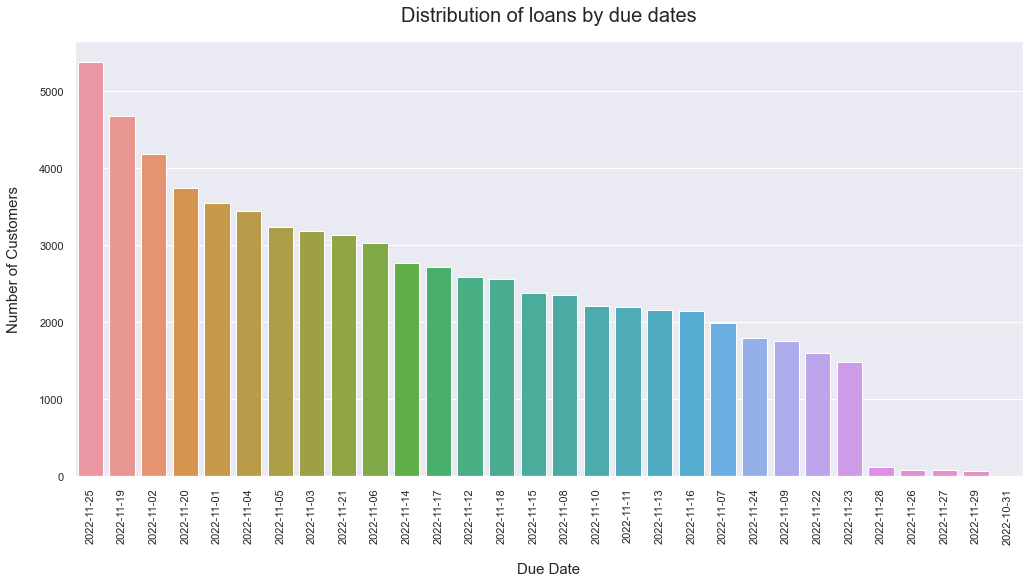

In [33]:
ax = sns.barplot(x='Due Date', y='Count', data = df_date, ci=None)
plt.xticks(rotation=90)
plt.ylabel(ylabel = "Number of Customers" , labelpad=18, fontdict = {'size':15})
plt.xlabel(xlabel = "Due Date" , labelpad=18, fontdict = {'size':15})
plt.tick_params(pad=5)
plt.title("Distribution of loans by due dates",fontdict={'size':20}, pad=20)
plt.show()

__Insights and Inferences__
1. Number of customers had due dates for 25th November 2022 at 5372, followed by 19th November 2022 and 2nd November 2022.
2. There is least number of customers had due dates in between 26th November 2022 to 29th November 2022 and on 31st October 2022.
3. Across all 30 days, Due dates ranged from 31st October 2022 to 29th November 2022.

## 5. Unique number of customers contacted on daily basis - only completed calls are to be considered

In [34]:
df_completed = df[df['Status'] == "completed"]
df_completed.head()

,Loan Number,Due Date,State,DOB,Loan Amount,Campaign ID,Call time,Status,Call Date,Age,Age_groups
0,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,166790104,2022-12-03T13:16:04.150Z,completed,2022-12-03,36,30-40
1,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,167104482,2022-12-04T05:50:06.501Z,completed,2022-12-04,36,30-40
2,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,167820924,2022-12-04T08:54:15.613Z,completed,2022-12-04,36,30-40
3,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,168389540,2022-12-04T13:04:32.924Z,completed,2022-12-04,36,30-40
4,1003431,2022-10-31,KARNATAKA,1987-02-09,240000.0,168801291,2022-12-05T04:48:55.139Z,completed,2022-12-05,36,30-40


In [35]:
df_completed_ = df_completed.groupby(['Call Date'])['Loan Number'].nunique().reset_index(name='Count')
df_completed_

,Call Date,Count
0,2022-12-02,7839
1,2022-12-03,6929
2,2022-12-04,6102
3,2022-12-05,6283
4,2022-12-06,5663
5,2022-12-07,4259


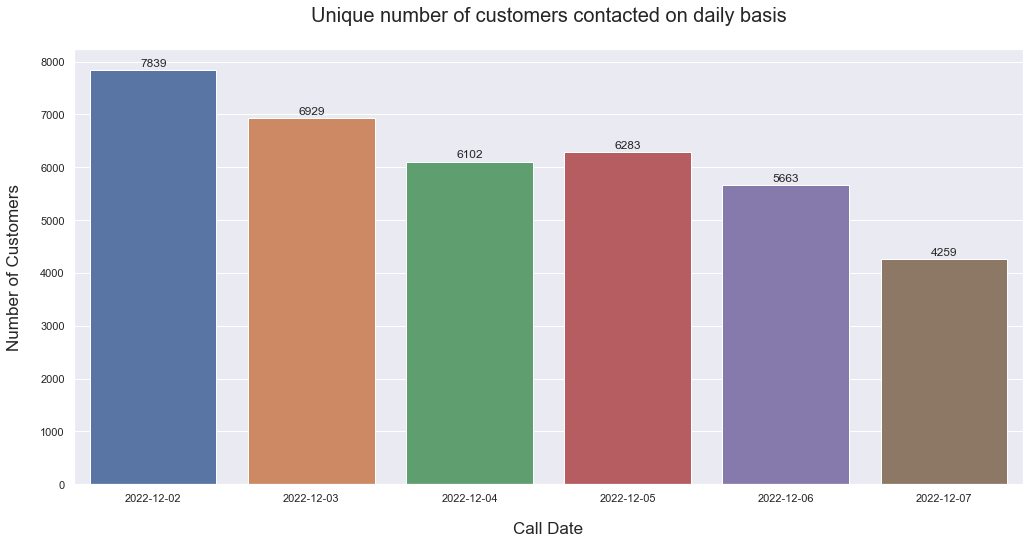

In [36]:
ax = sns.barplot(x='Call Date', y='Count', data=df_completed_, ci=None)
ax.set_title('Unique number of customers contacted on daily basis', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Customers', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('Call Date', fontdict={'size':17}, labelpad=18)
x_tick_labels = ax.get_xticklabels()
xtick_order = [label.get_text() for label in x_tick_labels]
order_val = [df_completed_[df_completed_['Call Date'] == pd.to_datetime(i)].Count.values[0] for i in xtick_order]
ax.bar_label(ax.containers[0],labels= order_val, padding=2)
plt.show()

__Insights and Inferences__
1. Number of customers contacted on daily basis was highest for 2nd December 2022 At 7839, followed by 3rd December 2022 and 5th December 2022.
2. The least number of customers was contacted on 7th December 2022 about 4259.
3. Across all 6 days, Number of customer contacted on daily basis ranged from 4259 to 7839.

## 6. Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc.

In [37]:
# Compute the number of unique customers contacted on each day
customers_per_day = df.groupby("Call Date")["Loan Number"].nunique()
customers_per_day.reset_index()

,Call Date,Loan Number
0,2022-12-02,7839
1,2022-12-03,6929
2,2022-12-04,6106
3,2022-12-05,6287
4,2022-12-06,5663
5,2022-12-07,4260


In [38]:
# Compute Total unique customers
total_customers = df["Loan Number"].nunique()
print("Total unique customers :", total_customers)

Total unique customers : 11210


In [39]:
# Compute the number of customers not contacted on each day
customers_not_contacted_per_day = total_customers - customers_per_day

# Print the number of customers not contacted on each day
df_unique_calls = customers_not_contacted_per_day.reset_index().rename(columns={'Loan Number':'Unique_customer'})
df_unique_calls

,Call Date,Unique_customer
0,2022-12-02,3371
1,2022-12-03,4281
2,2022-12-04,5104
3,2022-12-05,4923
4,2022-12-06,5547
5,2022-12-07,6950


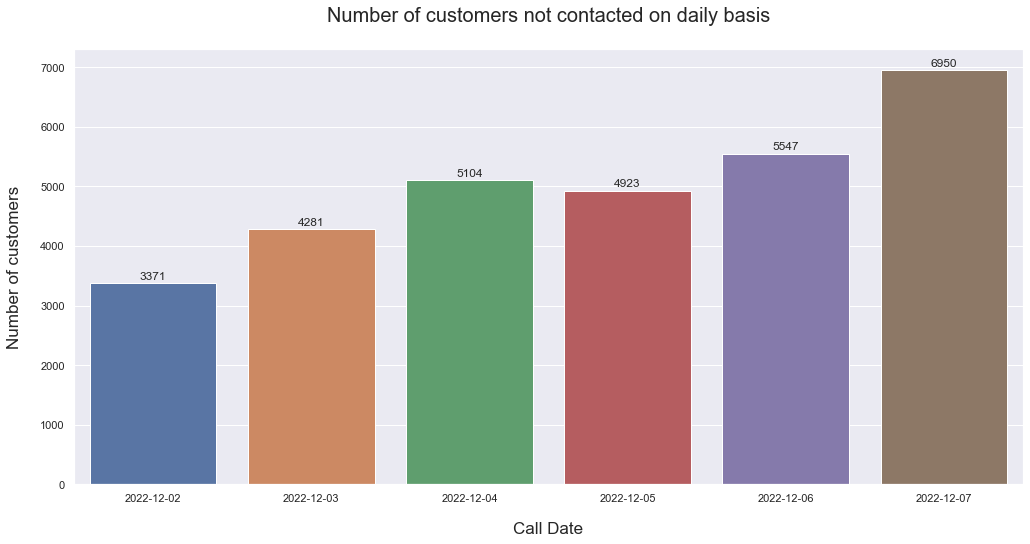

In [40]:
ax = sns.barplot(x = 'Call Date', y='Unique_customer', data=df_unique_calls, orient="v", ci=None)
ax.set_title('Number of customers not contacted on daily basis', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of customers', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('Call Date', fontdict={'size':17}, labelpad=18)
x_tick_labels = ax.get_xticklabels()
xtick_order = [label.get_text() for label in x_tick_labels]
order_val = [df_unique_calls[df_unique_calls['Call Date']==i].Unique_customer.values[0] for i in pd.to_datetime(xtick_order)]
ax.bar_label(ax.containers[0],labels= order_val, padding=2)
plt.show()

__Insights and Inferences__
1. Number of customers not contacted on daily basis was highest for 7th December 2022 At 6950, followed by 6th December 2022 and 4th December 2022.
2. The number of customers was not contacted on daily basis was lowest on 2nd December 2022 about 3371.
3. Across all 6 days, Number of customers not contacted on daily basis ranged from 3371 to 6950.

## 7. Who are the customers who have been contacted the most

In [41]:
total_calls = df[['Loan Number']].value_counts().reset_index().rename(columns={0:'Total_calls'}).nlargest(100, 'Total_calls')

# let's view only call that higher than or equal to 20 
total_calls1 = total_calls[total_calls['Total_calls'] >= 20]
total_calls1.head(10)

,Loan Number,Total_calls
0,1659081,38
1,1580447,30
2,1542440,28
3,1564892,28
4,1759399,27
5,1817574,27
6,1814726,26
7,1691978,26
8,1637862,26
9,1625201,26


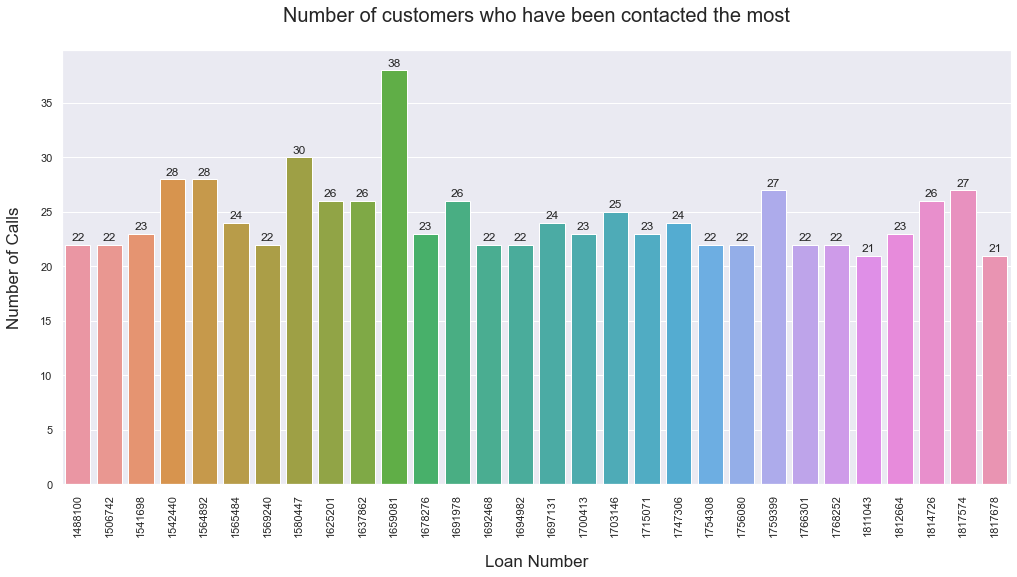

In [42]:
ax = sns.barplot(x = 'Loan Number', y='Total_calls', data=total_calls1.head(30), orient="v", ci=None)
plt.xticks(rotation=90)
ax.set_title('Number of customers who have been contacted the most', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Calls', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('Loan Number', fontdict={'size':17}, labelpad=18)
x_tick_labels = ax.get_xticklabels()
xtick_order = [int(label.get_text()) for label in x_tick_labels]
order_val = [total_calls1[total_calls1['Loan Number']==i].Total_calls.values[0] for i in xtick_order]
ax.bar_label(ax.containers[0],labels= order_val, padding=2)
plt.show()

__Insights and Inferences__
1. Number of calls was highest for Loan Number 1659081 at 38, followed by Loan Number 1580447 and Loan Number 1542440.
2. Loan Number 1659081 accounted for 5.18% of all the calls.
3. Across all 30 Loan Number, Number of calls ranged from 21 to 38.

# 8. Who are the customers who have been contacted the least

In [43]:
# compute least number of calls, like where calls is only 1
least_calls = df[['Loan Number', 'Call time']].groupby('Loan Number').nunique().reset_index().rename(columns={'Call time':'number_of_calls'})
least_calls1 = least_calls[least_calls['number_of_calls'] <= 1].reset_index(drop=True)
least_calls1

,Loan Number,number_of_calls
0,885009,1
1,1015791,1
2,1022354,1
3,1034626,1
4,1040953,1
...,...,...
1846,1820906,1
1847,1821781,1
1848,1821828,1
1849,1823931,1


It not possible to visualize **_customers who have been contacted the least_** becuase they are too much. If i go & see who are the customers that have recieved calls less that 5 or 10 ,then there will be thousands of customers, so we can't visualize each user. If i am trying to visualize them then i will get this type of result.

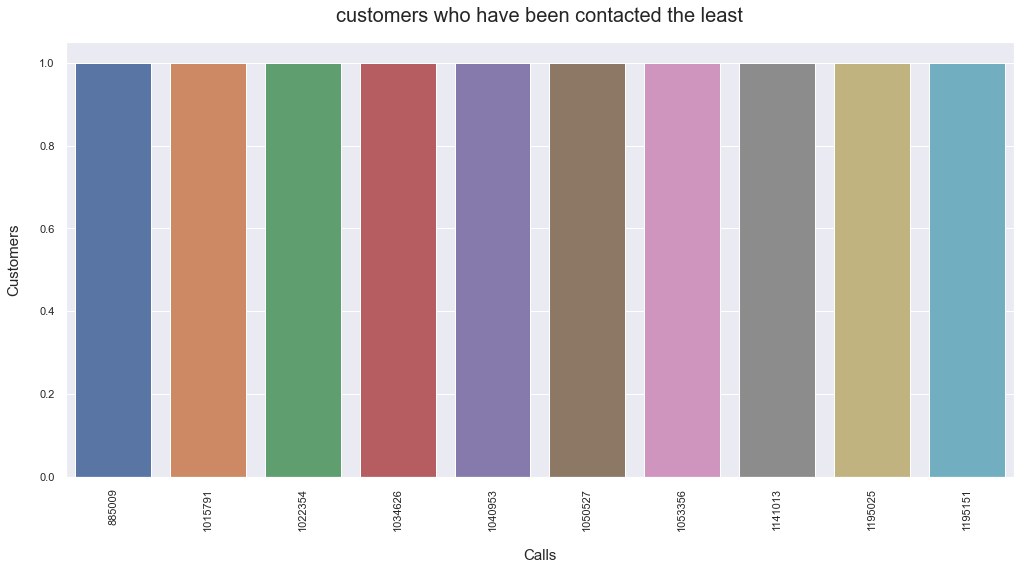

In [44]:
ax = sns.barplot(x = least_calls1['Loan Number'].head(10) , y = least_calls1['number_of_calls'].head(10))
plt.xticks(rotation=90)
plt.ylabel(ylabel = "Customers" , labelpad=18, fontdict = {'size':15})
plt.xlabel(xlabel = "Calls" , labelpad=18, fontdict = {'size':15})
plt.tick_params(pad=5)
plt.title("customers who have been contacted the least",fontdict={'size':20}, pad=20)
plt.show()

To solve this issue, I am going to visualize, only the number of customers, who have been recieved only 1 calls, with customers who have been never reached out. 

# 9. How many customers have never been reached out?

In [45]:
# compute failed calls
failed_calls = df[['Loan Number', 'Status']][df['Status'] == 'FAILED'].reset_index(drop=True)
failed_calls = failed_calls['Status'].value_counts().FAILED
print(f"Failed calls : {failed_calls}")

Failed calls : 18


In [46]:
least_calls = least_calls1['Loan Number'].count()
print(f"Number of least calls : {least_calls}")

Number of least calls : 1851


There are 18 customers who have never been reached out. Lets visualize this count with number of least calls.

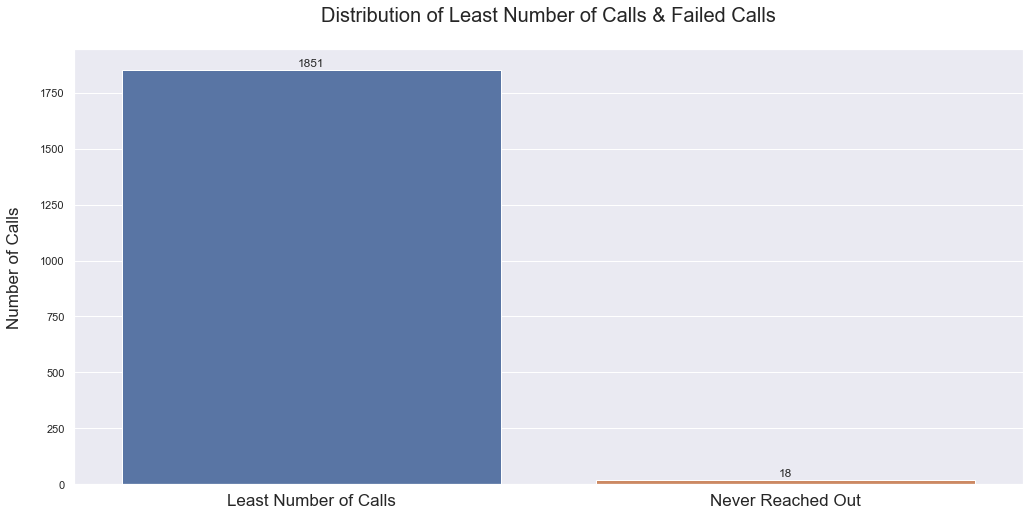

In [47]:
ax = sns.barplot(x=['Least Number of Calls', 'Never Reached Out'], y=[least_calls, failed_calls])
ax.set_title('Distribution of Least Number of Calls & Failed Calls', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Calls', fontdict={'size':17}, labelpad=18)
x_tick_labels = ax.get_xticklabels()
ax.bar_label(ax.containers[0],labels=[least_calls, failed_calls], padding=2)
plt.xticks(fontsize=17)
plt.show()

__Insights and Inferences__
1. There was 1851 customers had received only 1 calls.
2. There was 18 customers, Who have never been reached out. 

## 10. Distribution of calls by states.

In [48]:
df_states = df[['State', 'Call Date']].value_counts('State').reset_index(name='Total_Calls')
df_states.head()

,State,Total_Calls
0,MAHARASHTRA,10264
1,KARNATAKA,8848
2,TAMIL NADU,7198
3,TELANGANA,6030
4,ANDHRA PRADESH,5459


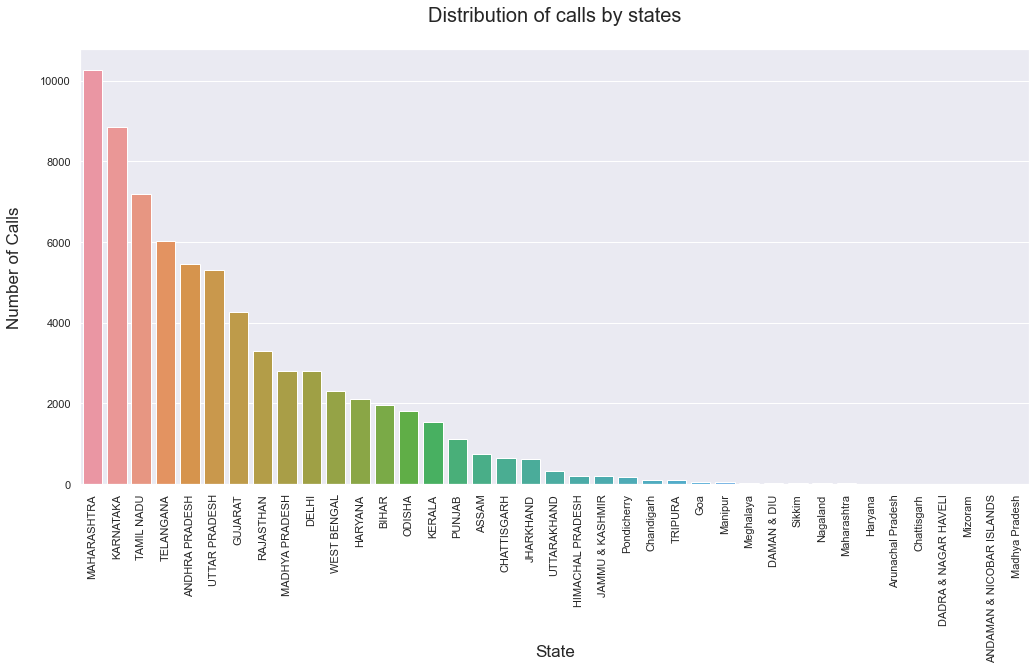

In [49]:
ax = sns.barplot(x = 'State', y='Total_Calls', data=df_states, orient="v", ci=None)
plt.xticks(rotation=90)
ax.set_title('Distribution of calls by states', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Calls', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('State', fontdict={'size':17}, labelpad=-18)
plt.show()

__Insights and Inferences__
1. Number of calls was highest for MAHARASHTRA at 10285, followed by KARNATAKA and TAMIL NADU.
2. MAHARASHTRA accounted for 14.57% of all the calls.
3. Across all 35 State, Number of calls ranged from 4 to 10285.

## 11. Distribution of calls by campaign ids

In [50]:
campaign_calls = df[['Campaign ID', 'Call time']].groupby('Campaign ID').nunique().reset_index().rename(columns={'Call time':'Number_of_calls'}).sort_values('Number_of_calls', ascending=False)
campaign_calls.head()

,Campaign ID,Number_of_calls
0,164168595,6901
1,164661895,6407
3,165448984,3736
20,170181308,3634
15,168801291,3543


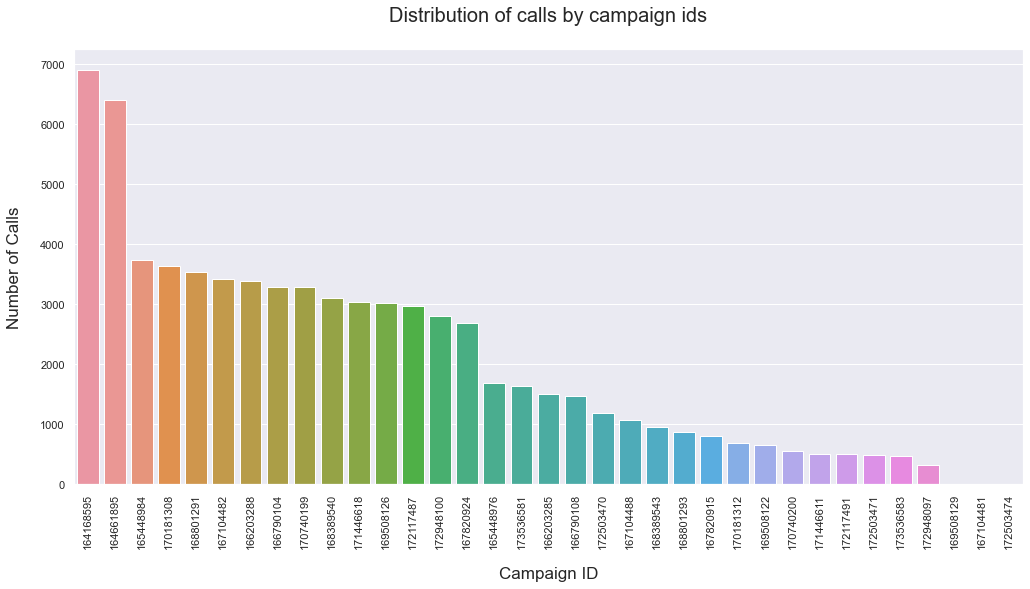

In [51]:
ax = sns.barplot(x = 'Campaign ID', y='Number_of_calls', data=campaign_calls, orient="v", order=campaign_calls['Campaign ID'].values, ci=None)
plt.xticks(rotation=90)
ax.set_title('Distribution of calls by campaign ids', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Calls', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('Campaign ID', fontdict={'size':17}, labelpad=18)
plt.show()

__Insights and Inferences__
1. Campaign ID 164168595 had the highest number of calls about 6901 and followed by Campaign ID 164661895.
2. Campaign ID 164168595 accounted for 9.78% of total customers.
3. Campaign ID 172503474, which had the lowest number of customers about 2.
4. Across all 35 Campaign ID, Number of customers ranged from 2 to 6901.

## 12. Unique number of customers by campaign ID

In [52]:
df_customers = df[["Loan Number", "Campaign ID"]].groupby(["Campaign ID","Loan Number"]).size().groupby("Campaign ID").size().reset_index(name="Count")
df_customers.head()

,Campaign ID,Count
0,164168595,6306
1,164661895,5833
2,165448976,1576
3,165448984,3430
4,166203285,1450


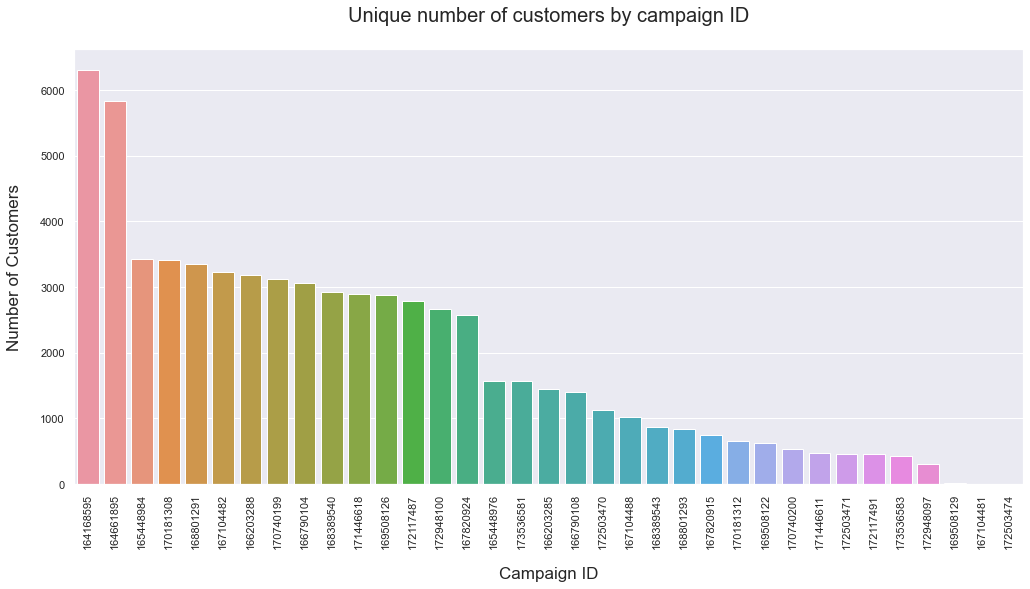

In [53]:
ax = sns.barplot(x = 'Campaign ID', y='Count', data=df_customers, order=df_customers.sort_values('Count', ascending=False)['Campaign ID'].values, orient="v", ci=None)
plt.xticks(rotation=90)
ax.set_title('Unique number of customers by campaign ID', fontdict={'size':20}, y=1.05)
ax.set_ylabel('Number of Customers', fontdict={'size':17}, labelpad=18)
ax.set_xlabel('Campaign ID', fontdict={'size':17}, labelpad=18)
plt.show()

__Insights and Inferences__
1. Campaign ID 164168595 had the highest unique number of customers about 6306 and followed by Campaign ID 164661895.
2. Campaign ID 164168595 accounted for 9.51% of total customers.
3. Campaign ID 172503474, which had the lowest number of customers about 2.
4. Across all 35 Campaign ID, Number of customers ranged from 2 to 6306.

***

## Conclusion
1. Number of customers was highest for __MAHARASHTRA__ at __10285__, followed by __KARNATAKA__ and __TAMIL NADU__.
2. Most of the customers took a __loan__ of __Rs. 5000__, and they are around __29625__ customers, followed by a __loan__ amount of __Rs. 7000__, which was availed by __14385__ customers. 
3. Number of customers was highest for __20-30__ age groups at __44437__, followed by __30-40__ and __40-50__ age group. 
4. Number of customers had __due dates__ for __25th November 2022__ at __5372__, followed by __19th November 2022__ and __2nd November 2022__.
5. Number of customers __contacted__ on __daily basis__ was highest for __2nd December 2022__ At __7839__, followed by __3rd December 2022__ and __5th December 2022__.
6. Number of customers __not contacted__ on __daily basis__ was highest for __7th December 2022__ At __6950__, followed by __6th December 2022__ and __4th December 2022__.
7. Number of calls was highest for Loan Number __1659081__ at __38__, followed by Loan Number __1580447__ and Loan Number __1542440__.
8. Number of calls was highest for __MAHARASHTRA__ at __10285__, followed by __KARNATAKA__ and __TAMIL NADU__.
9. Campaign ID __164168595__ had the highest number of calls about __6901__ and followed by Campaign ID __164661895__.
10. Campaign ID __164168595__ had the highest __unique__ number of customers about __6306__ and followed by Campaign ID __164661895__.
11. There was __1851__ customers had received only __1 calls__.
12. There was __18__ customers, Who have __never been reached out__.

***